# 04 Clustering

- K-Means Clustering
- Hierarchical Clustering
- Density-Based Clustering

# Clustering

<p align="center"> 
<img src="../images/04_Clustering/clustering_for_segmentation.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/cross_join_segmented_dataset.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/what_is_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_vs_classification.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_applications_financial.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_applications_medical.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/why_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/clustering_algorithms.png", width=800, height=600>
</p>

# K-Means Clustering

<p align="center"> 
<img src="../images/04_Clustering/k_means_algorithms.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/determine_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/determine_disimilarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/intra_distance_inter_distance.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/1d_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/2d_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/multi_dimentional_similarity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/how_k_means_works.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/initialize_k.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/calculate_distance.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/assign_centroid.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/compute_new_centroids.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/repeat.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_algorithm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_accuracy.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/choosing_k.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_recap.png", width=800, height=600>
</p>

## k-Means on a randomly generated dataset

## Import libraries

In [16]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [17]:
# set up a random seed.
np.random.seed(0)

In [19]:
# make random clusters of points 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

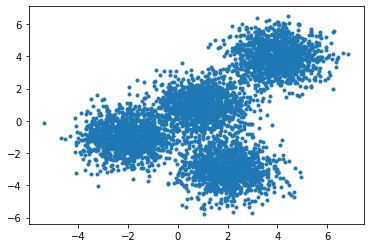

In [20]:
# display the scatter plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.savefig('../figs/04_Clustering/randomly_generated_data.png')

## Model

## Set up K-Means

>Initialize KMeans with these parameters:
- init: Initialization method of the centroids.
 - Value will be: "k-means++"
 - k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
- n\_clusters: The number of clusters to form as well as the number of centroids to generate.
 - Value will be: 4 (since we have 4 centers)
- n\_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia.
 - Value will be: 12

>the output parameter is called k_means. 


In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# labels for each point 
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [9]:
# coordinates of the cluster centers 
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Visualize

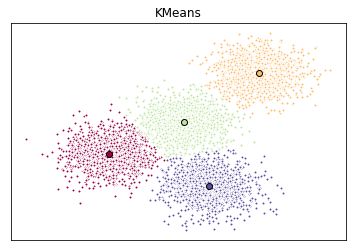

In [21]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Save plot
plt.savefig('../figs/04_Clustering/k_means_randomly_generated_data.png')

# Show the plot
plt.show()

## Customer Segmentation with K-Means

> apply customer segmentation on historical customer dataset. 

>Customer segmentation
- Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. 
- It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.

## Download Data

In [21]:
!wget -O ../data/Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-09-18 13:41:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘../data/Cust_Segmentation.csv’

../data/Cust_Segmen 100%[===================>]  33.47K   176KB/s    in 0.2s    

2019-09-18 13:41:58 (176 KB/s) - ‘../data/Cust_Segmentation.csv’ saved [34276/34276]



## Load Data

In [22]:
df = pd.read_csv('../data/Cust_Segmentation.csv')
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

## Pre-process

>Address in this dataset is a categorical variable. 
- k-means algorithm isn't directly applicable to categorical variables

In [23]:
# drop Address feature
df = df.drop('Address', axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

## Normalize Data

>interpret features with different magnitudes and distributions equally. 

In [24]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Model

In [25]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

## Insights

In [26]:
#assign the labels to each row 
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        2  
2        1.0             20.9        0  
3        0.0              6.3        0  
4        0.0              7.2        1

In [27]:
# check the centroid values by averaging the features in each cluster.
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.468413  32.964561  1.614792        6.374422   31.164869   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         402.295082  41.333333  1.956284       15.256831   83.928962   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032541    2.104133   0.285185        10.094761  
1         5.678444   10.907167   0.285714         7.322222  
2         3.103639    5.765279   0.171233        10.724590

## Visualize

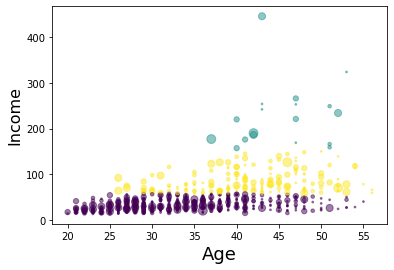

In [29]:
#look at the distribution of customers based on their age and income:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.savefig('../figs/04_Clustering/age_income_customers_distribution.png')

plt.show()


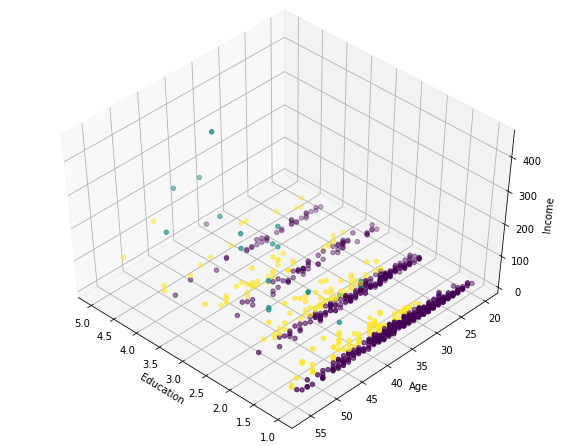

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

plt.savefig('../figs/04_Clustering/education_age_income_customers_distribution.png')


>k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. 

>The customers in each cluster are similar to each other demographically. 

> we can create a profile for each group, considering the common characteristics of each cluster. 

>The 3 clusters can be:
- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

# Hierarchical Clustering

<p align="center"> 
<img src="../images/04_Clustering/hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/divisive_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_before.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_first.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_example_completed.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dendrogram.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/agglomerative_algorithm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/calculate_distance_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dissimilarity_matrix.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/distance_between_clusters.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/pros_cons_hierarchical_clustering.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/hierarchical_clustering_vs_k_means.png", width=800, height=600>
</p>

## Import Libraries

In [31]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

## Generating Random Data

>generating a set of data using the make_blobs class.

>Input these parameters into make_blobs:
- n_samples: The total number of points equally divided among clusters.
 - Choose a number from 10-1500
- centers: The number of centers to generate, or the fixed center locations.
 - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
- cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
 - Choose a number between 0.5-1.5

In [32]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

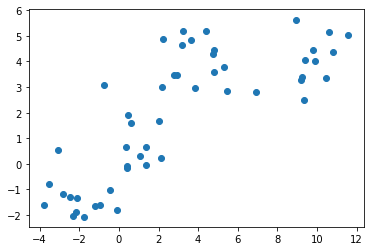

In [33]:
# plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 
plt.savefig('../figs/04_Clustering/randomly_generated_data_hierarchical_clustering.png')


## Agglomerative Clustering

>Agglomerative Clustering class will require two inputs:
- n_clusters: The number of clusters to form as well as the number of centroids to generate.
 - Value will be: 4
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
 - Value will be: 'complete'
 - Note: It is recommended you try everything with 'average' as well

In [34]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

## Model

In [35]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

## Visualize

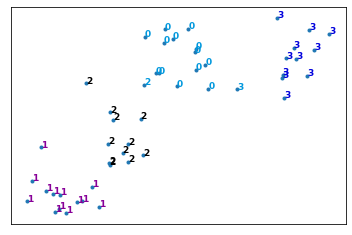

In [36]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# Save plot
plt.savefig('../figs/04_Clustering/agglomerative_clustering.png')

# Display the plot
plt.show()

## Dendrogram

>distance matrix contains the distance from each point to every other point of a dataset .
- Use the function distance_matrix, which requires two inputs. 
- Use the Feature Matrix, X2 as both inputs and save the distance matrix to a variable called dist_matrix

>distance values are symmetric, with a diagonal of 0's. 
- print out dist_matrix to make sure it's correct

In [37]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.73530716 0.52307717 ... 0.46518963 0.41687005 0.40333712]
 [0.73530716 0.         1.21703719 ... 1.14056847 0.3245043  0.44902301]
 [0.52307717 1.21703719 0.         ... 0.0864149  0.92062456 0.92622447]
 ...
 [0.46518963 1.14056847 0.0864149  ... 0.         0.85031287 0.86766496]
 [0.41687005 0.3245043  0.92062456 ... 0.85031287 0.         0.18335538]
 [0.40333712 0.44902301 0.92622447 ... 0.86766496 0.18335538 0.        ]]


>Using the linkage class from hierarchy, pass in the parameters:
- The distance matrix
- 'complete' for complete linkage

In [38]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


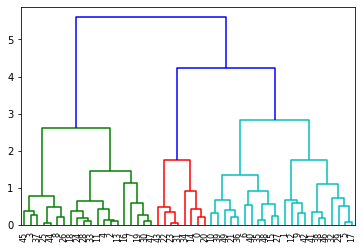

In [42]:
dendro = hierarchy.dendrogram(Z)
plt.gcf() 
plt.savefig('../figs/04_Clustering/dendrogram_complete.png')

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


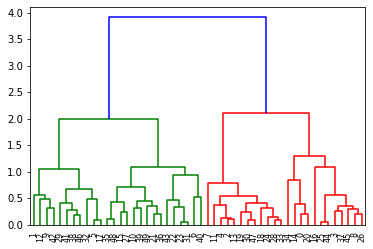

In [44]:
# change linkage to average linkage 
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)
plt.gcf() 
plt.savefig('../figs/04_Clustering/dendrogram_average.png')

## Clustering on Vehicle dataset

>Find the most distinctive clusters of vehicles
- summarize the existing vehicles and help manufacture to make decision about new models simply.

## Download Data

In [45]:
!wget -O ../data/cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2019-09-18 17:57:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘../data/cars_clus.csv’

../data/cars_clus.c 100%[===================>]  17.36K  --.-KB/s    in 0s      

2019-09-18 17:57:42 (43.6 MB/s) - ‘../data/cars_clus.csv’ saved [17774/17774]



## Read Data

In [46]:
df = pd.read_csv('../data/cars_clus.csv')
print ("Shape of dataset: ", df.shape)

Shape of dataset:  (159, 16)


In [47]:
df.head(5)

manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0

## Clean Data 

In [48]:
# drop rows that have null value
print ("Shape of dataset before cleaning: ", df.size)

Shape of dataset before cleaning:  2544


In [49]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

In [50]:
df = df.dropna()
df = df.reset_index(drop=True)

In [51]:
print ("Shape of dataset after cleaning: ", df.size)

Shape of dataset after cleaning:  1872


In [52]:
df.head(5)

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0

## Select  feature set

In [53]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

## Normalize

>MinMaxScaler transforms features by scaling each feature to a given range.
- It is by default (0, 1). 
- estimator scales and translates each feature individually such that it is between zero and one.

In [54]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Model

## Clustering using Scipy

### Calculate the distance matrix

In [55]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

>In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 

>use Scipy for calculating the distance between the newly formed cluster and each complete centroid

In [56]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


>Hierarchical clustering does not require a pre-specified number of clusters.

>However, in some applications we want a partition of disjoint clusters just as in flat clustering. 
- use a cutting line

In [57]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

### Determine number of clusters directly

In [58]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

### Plot Dendrogram

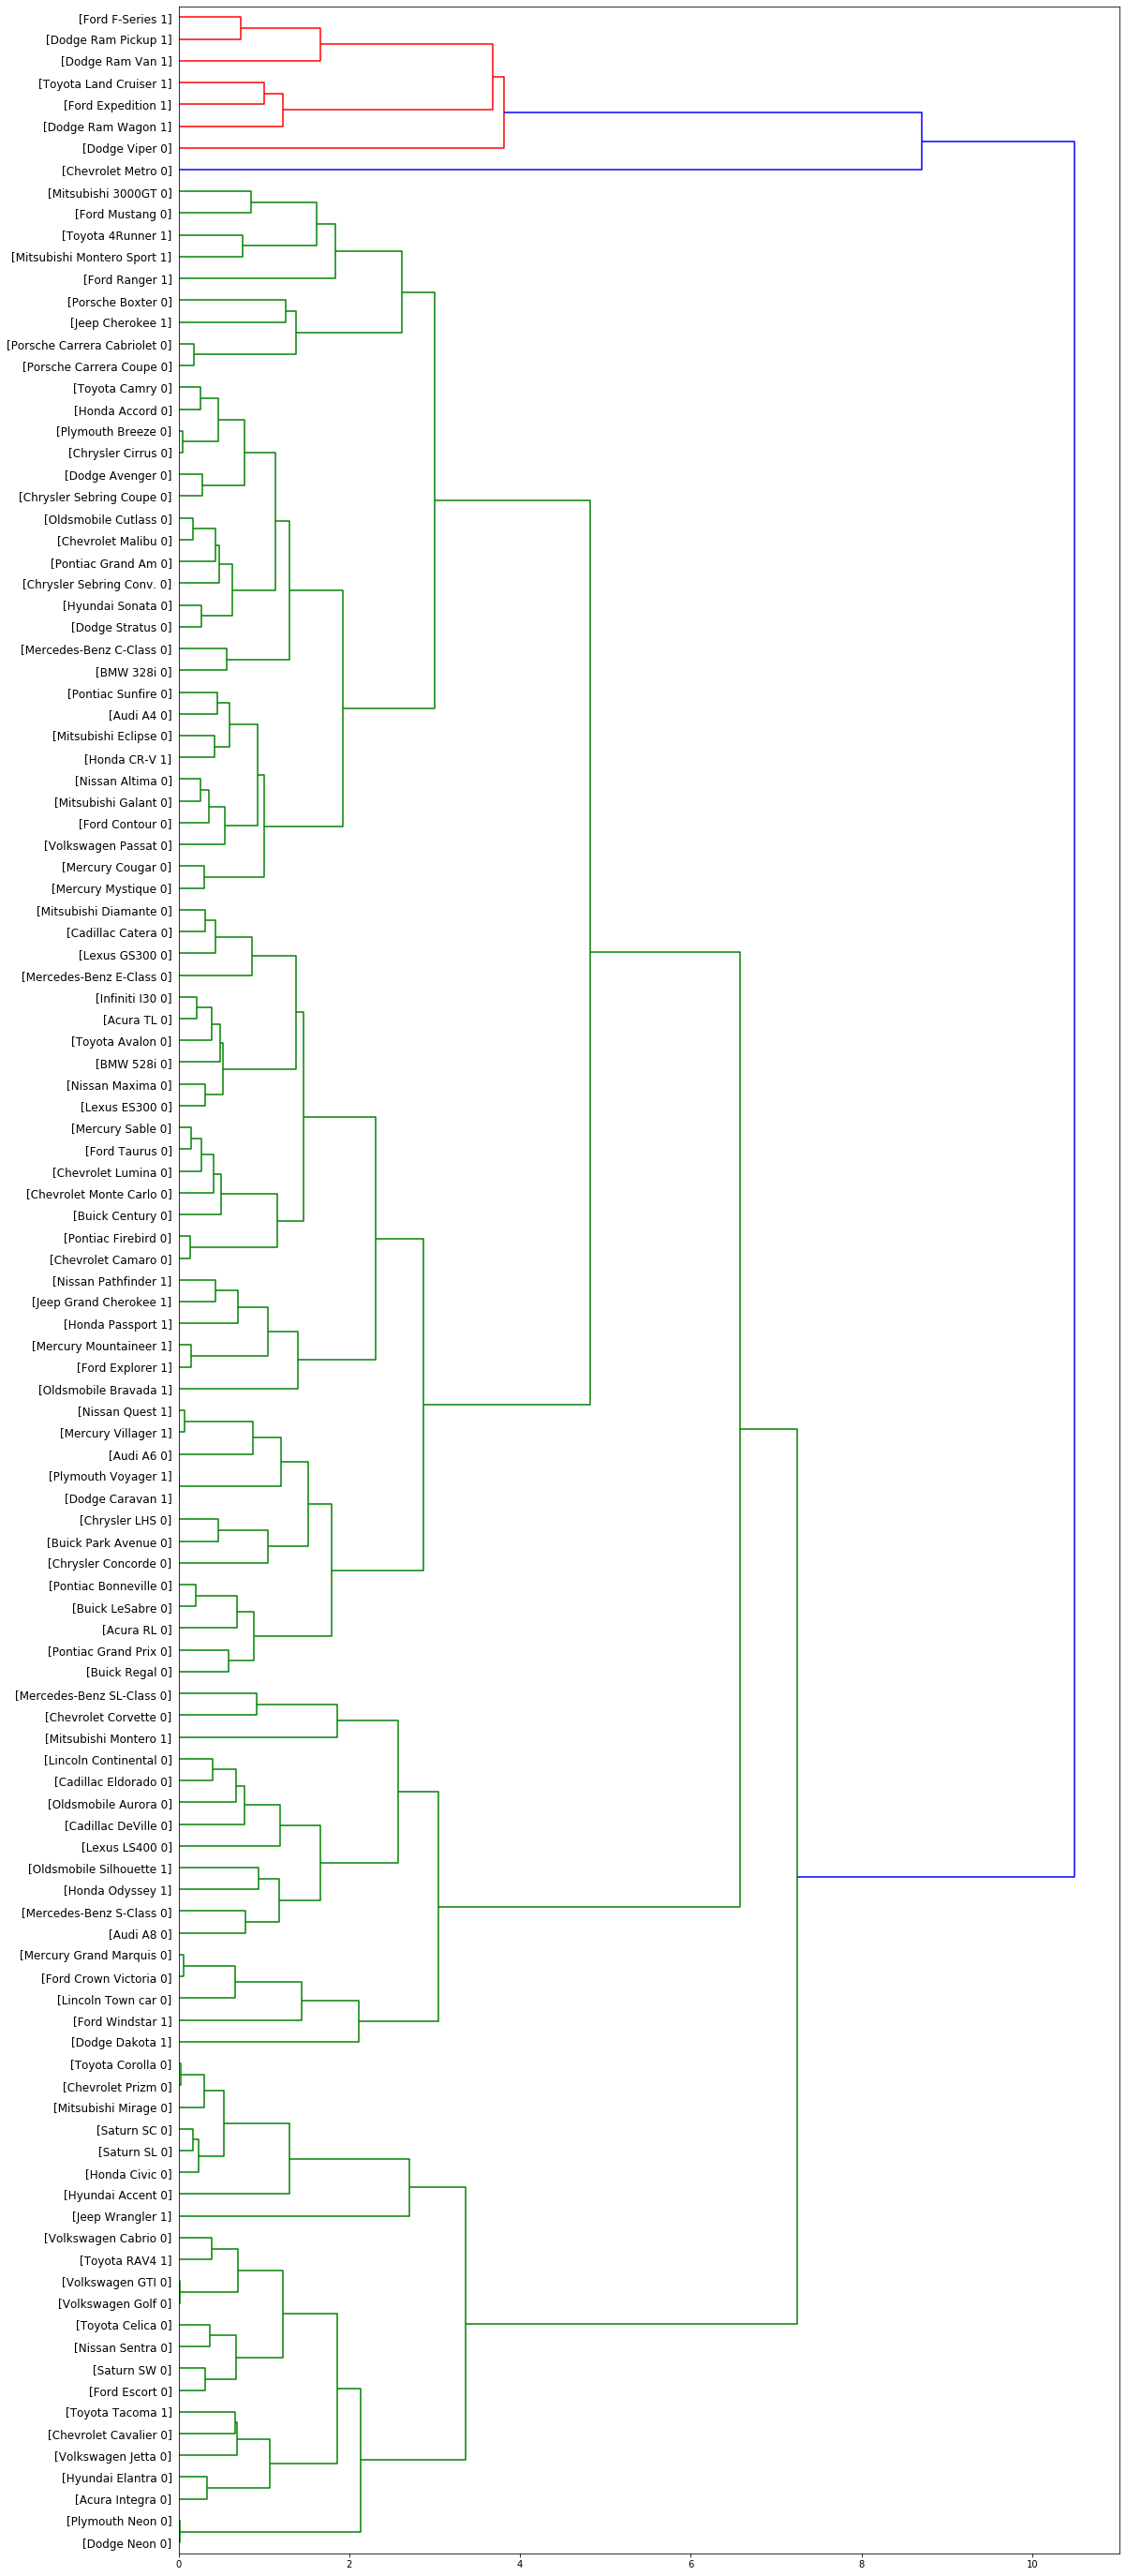

In [72]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.gcf() 
plt.savefig('../figs/04_Clustering/vehicle_dendrogram_scipy.png')

## Clustering using scikit-learn

In [73]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


>use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. 

>The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. 

>The linkage criteria determines the metric used for the merge strategy:
- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [74]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [75]:
# add a new field to the dataframe to show the cluster of each row
df['cluster_'] = agglom.labels_
df.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster_  
0         1  
1         2  
2         2  
3         1  
4         2

## Visualize

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

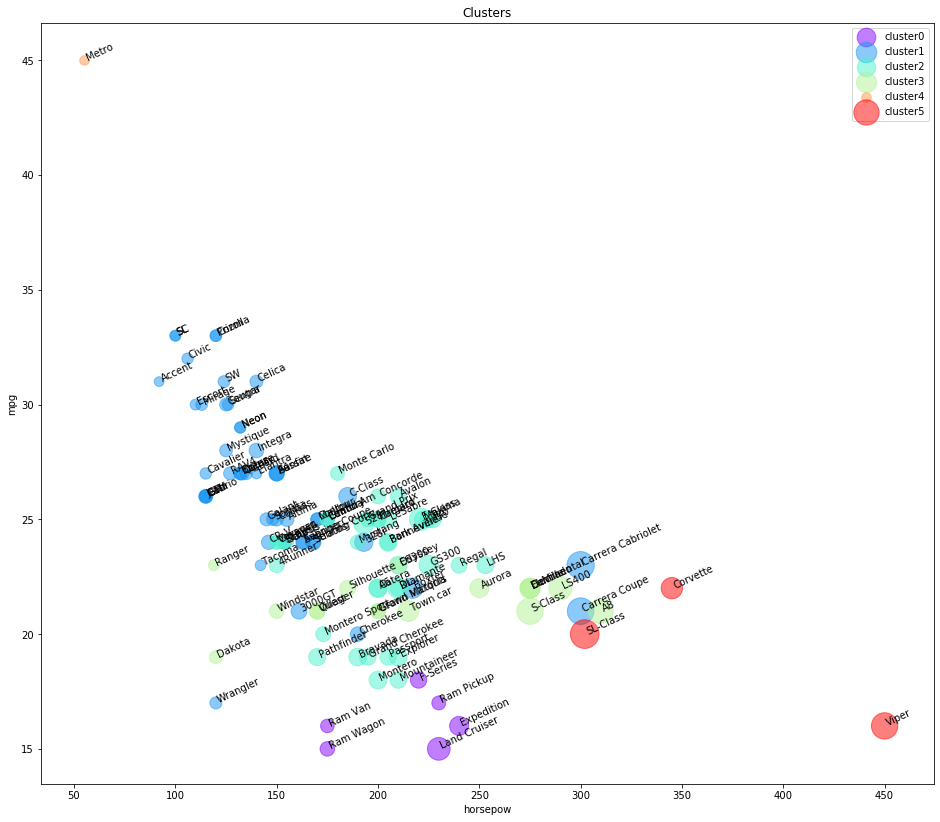

In [78]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.savefig('../figs/04_Clustering/clusters_without_centroid.png')

>distribution of each cluster using the scatter plot

>it is not very clear where is the centroid of each cluster. 

>there are 2 types of vehicles in the dataset:
- "truck" (value of 1 in the type column)
- "car" (value of 1 in the type column). 

>use the 2 types to distinguish the classes, and summarize the cluster. 

In [79]:
# count the number of cases in each group
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [80]:
# look at the characterestics of each cluster
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

> main clusters with the majority of vehicles in those.

>Cars:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.

>Trucks:

- Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
- Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
- Cluster 3: with good mpg and horsepower, low price.

>Did not use type , and price of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

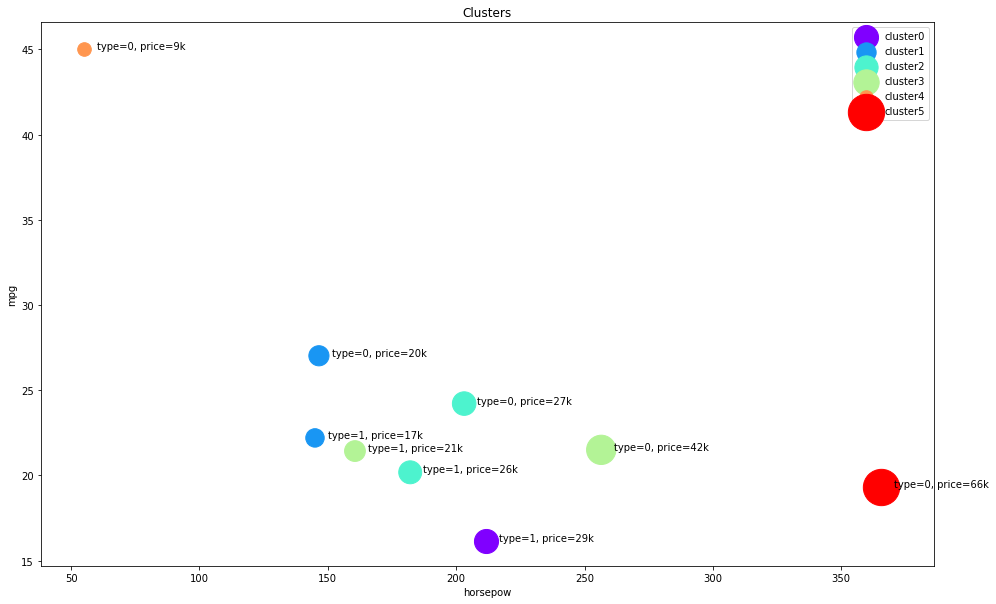

In [81]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.savefig('../figs/04_Clustering/clusters_with_centroid.png')

# Density-Based Clustering

<p align="center"> 
<img src="../images/04_Clustering/spherical_vs_arbitary.png", width=800, height=600>
</p>

>The traditional clusteing techniques might be unable to achieve good results when applied to tasks with arbitrary shape clusters, or clusters within cluster
- elements in the same cluster might not share enough similarity or the performance may be poor

<p align="center"> 
<img src="../images/04_Clustering/k_means_vs_density_points_outliers.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_vs_density_with_k_means.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/k_means_vs_density_with_density.png", width=800, height=600>
</p>

>Density-based Clustering locates regions of high density that are separated from one another by regions of low density. 
- Density is defined as the number of points within a specified radius

### DBSCAN

>DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise

>clustering algorithms which works based on density of object. 
- if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

<p align="center"> 
<img src="../images/04_Clustering/dbscan_stations.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dbscan_groups_of_stations.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/what_is_dbscan.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/how_dbscan_works.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/core_point.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/border_point.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/outlier.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/identify_all_points.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dbscan_clusters.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/04_Clustering/dbscan_pros.png", width=800, height=600>
</p>

## Import libraries

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

## Generate Data 

>createDataPoints function below will generate the data points and requires these inputs:
- centroidLocation: Coordinates of the centroids that will generate the random data.
 - Example: input: [[4,3], [2,-1], [-1,4]]
- numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
 - Example: 1500
- clusterDeviation: The standard deviation between the clusters. The larger the number, the further the spacing.
 - Example: 0.5

In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

>Use createDataPoints with the 3 inputs and store the output into variables X and y

In [3]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

## Model

>DBSCAN works based on two parameters: 
- **Epsilon** 
 - determine a specified radius that if includes enough number of points within, we call it dense area
- **Minimum Points**
 - determine the minimum number of data points we want in a neighborhood to define a cluster.

In [4]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 1, 0, 2])

## Distinguish Outliers

>Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [5]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [7]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

## Visualize Data 

In [8]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

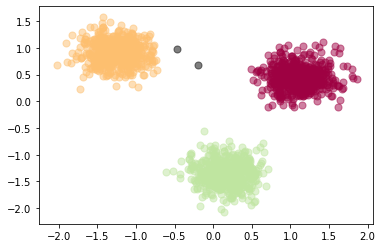

In [9]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)
    plt.savefig('../figs/04_Clustering/dbscan_generated_data.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


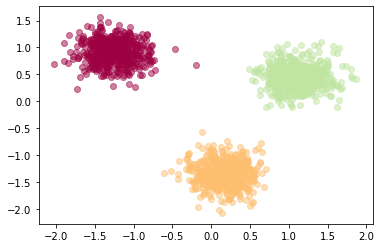

In [10]:
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.savefig('../figs/04_Clustering/k_means_generated_data_with_outlier.png')
plt.show()

## Weather Station Clustering

>use DBSCAN for class identification on a spatial context tasks.
- DBSCAN algorithm can find out any arbitrary shape cluster without getting affected by noise. 

### Cluster the location of weather stations in Canada.
- DBSCAN can be used to find the group of stations which show the same weather condition. 
- it not only finds different arbitrary shaped clusters, it can find the denser part of data-centered samples by ignoring less-dense areas or noises.

### Environment Canada Monthly Values for July - 2015 Dataset
- Name in the table	Meaning
- Stn_Name	Station Name
- Lat	Latitude (North+, degrees)
- Long	Longitude (West - , degrees)
- Prov	Province
- Tm	Mean Temperature (°C)
- DwTm	Days without Valid Mean Temperature
- D	Mean Temperature difference from Normal (1981-2010) (°C)
- Tx	Highest Monthly Maximum Temperature (°C)
- DwTx	Days without Valid Maximum Temperature
- Tn	Lowest Monthly Minimum Temperature (°C)
- DwTn	Days without Valid Minimum Temperature
- S	Snowfall (cm)
- DwS	Days without Valid Snowfall
- S%N	Percent of Normal (1981-2010) Snowfall
- P	Total Precipitation (mm)
- DwP	Days without Valid Precipitation
- P%N	Percent of Normal (1981-2010) Precipitation
- S_G	Snow on the ground at the end of the month (cm)
- Pd	Number of days with Precipitation 1.0 mm or more
- BS	Bright Sunshine (hours)
- DwBS	Days without Valid Bright Sunshine
- BS%	Percent of Normal (1981-2010) Bright Sunshine
- HDD	Degree Days below 18 °C
- CDD	Degree Days above 18 °C
- Stn_No	Climate station identifier (first 3 digits indicate drainage basin, last 4 characters are for sorting alphabetically).
- NA	Not Available

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

## Download Data

In [12]:
!wget -O ../data/weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2019-09-19 16:47:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘../data/weather-stations20140101-20141231.csv’

../data/weather-sta 100%[===================>] 126.78K   140KB/s    in 0.9s    

2019-09-19 16:47:10 (140 KB/s) - ‘../data/weather-stations20140101-20141231.csv’ saved [129821/129821]



## Read Data

In [6]:
df = pd.read_csv('../data/weather-stations20140101-20141231.csv')
df.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

## Clean Data

In [7]:
# remove rows that dont have any value in the Tm field
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)
df.head()

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...  8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  

[5 rows x 25 columns]

## Visualize Data

>Visualization of stations on map using basemap package. 
- Basemap provides the facilities to transform coordinates to a map projections.
- the size of each data points represents the average of maximum temperature for each station in a year.

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


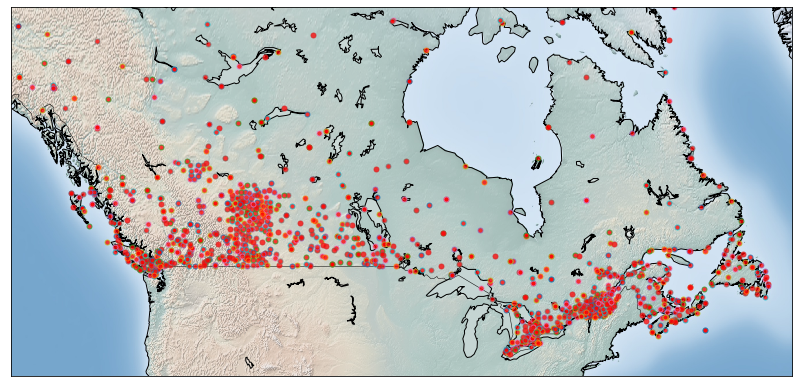

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

#Visualization1
for index,row in df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.savefig('../figs/04_Clustering/weather_stations.png')
plt.show()

## Clustering of stations based on their location

>pass DBSCAN the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them.

In [12]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [13]:
sklearn.utils.check_random_state(1000)

RandomState(MT19937) at 0x7FBCA1277990

In [14]:
Clus_dataSet = df[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [15]:
# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# A sample of clusters
df[["Stn_Name","Tx","Tm","Clus_Db"]].head()

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

### the cluster label for outliers is -1

## Visualize clusters based on location

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


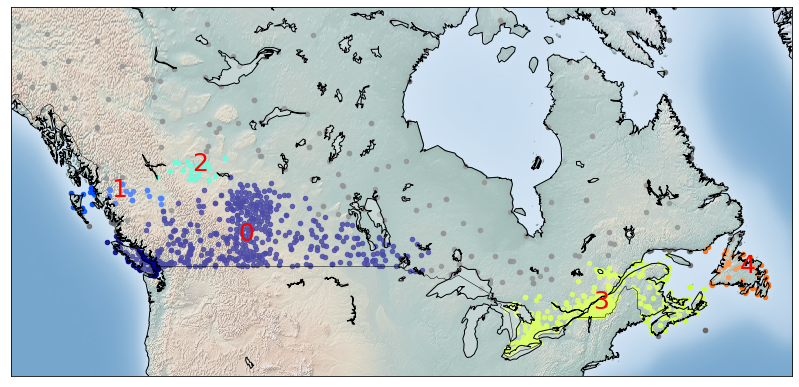

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

plt.savefig('../figs/04_Clustering/weather_stations_location_clustering.png')        

## Clustering of stations based on their location, mean, max, and min Temperature

In [19]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [20]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

/home/ayman/anaconda3/envs/mlpy/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# A sample of clusters
df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

## Visualize clusters based on location and Temperture

Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


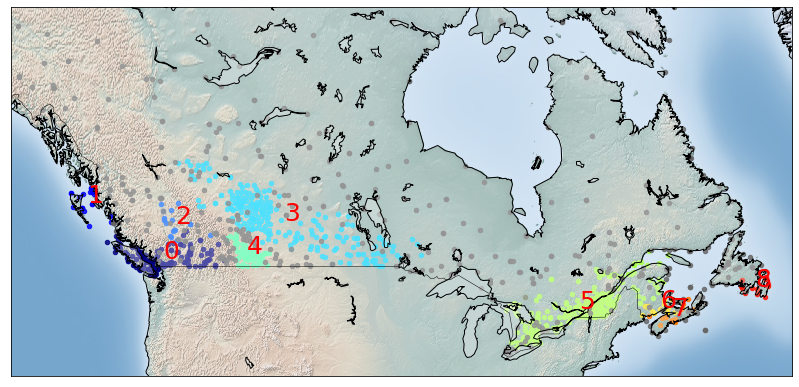

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

plt.savefig('../figs/04_Clustering/weather_stations_location_temperture_clustering.png')                